In [1]:
 from google.colab import files
 a = files.upload()

Saving tweets.csv to tweets.csv


In [2]:
import pandas as pd

# DATA PREPROCESSING

In [4]:
data = pd.read_csv("tweets.csv")
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [7]:
data.shape

(11370, 5)

In [12]:
data["location"].fillna(method='bfill',inplace=True)

In [14]:
data["location"].fillna(method='ffill',inplace=True)

In [15]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [16]:
data.head(7)

,id,keyword,location,text,target
0,0,ablaze,New York City,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,New York City,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,OC,"""Lord Jesus, your love brings freedom and pard...",0
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1


In [17]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['id', 'keyword', 'location', 'text', 'target']

In [20]:
import numpy as np
for i in columns:
  print("number of unique values in ",i," = ",len(np.unique(data[i])))

number of unique values in  id  =  11370
number of unique values in  keyword  =  219
number of unique values in  location  =  4504
number of unique values in  text  =  11223
number of unique values in  target  =  2


In [18]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data['keyword'] = LabelEncoder().fit_transform(data['keyword'])
data['location'] = LabelEncoder().fit_transform(data['location'])


In [22]:
data.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


# DATA VISUALIZATION

In [24]:
true_disaster = []
false_disaster = []
for i in data['target']:
  if i == 1:
    true_disaster.append(i)
  else:
    false_disaster.append(i)
print("percentage of True disaster tweets =",(len(true_disaster)/len(data['target']))*100)
print("percentage of False disaster tweets =",(len(false_disaster)/len(data['target']))*100)

percentage of True disaster tweets = 18.59278803869833
percentage of False disaster tweets = 81.40721196130167


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 2114 artists>

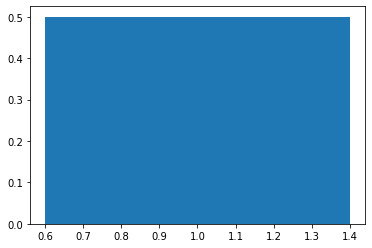

In [29]:
plt.bar(x=true_disaster,height = 0.5)

<BarContainer object of 9256 artists>

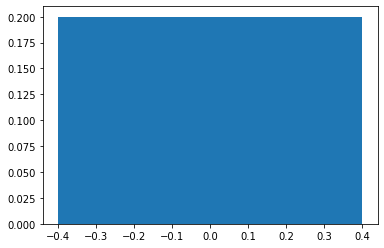

In [30]:
plt.bar(x=false_disaster,height = 0.2)

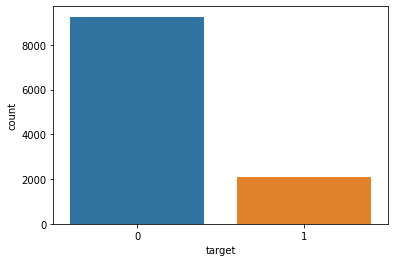

In [31]:
sns.countplot(x='target',data=data)

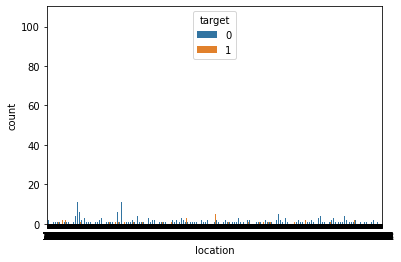

In [32]:
sns.countplot(x='location',hue='target',data=data)

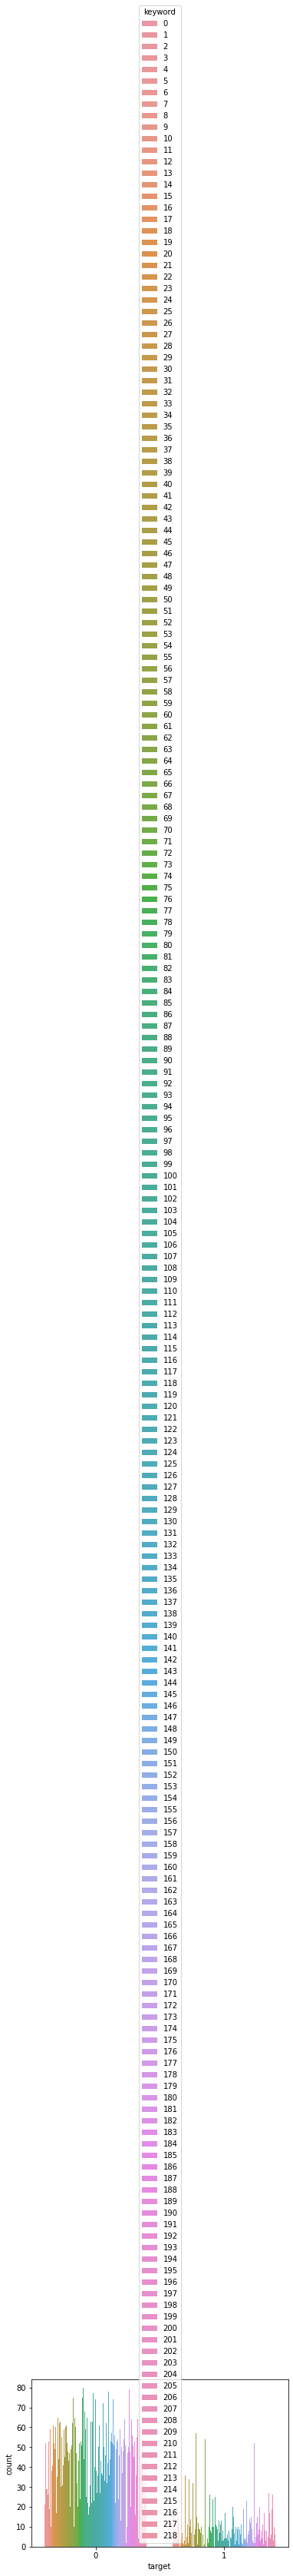

In [34]:
sns.countplot(x = 'target',hue='keyword',data=data)

# CREATING THE MODEL

In [35]:
data.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [36]:
data.drop(["id","keyword","location"],axis = 1,inplace=True)

In [37]:
data.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [39]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [40]:
x = data['text']
y = data['target']

In [42]:
y = np.array(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [55]:
tokenizer = Tokenizer(num_words=5000,lower=True)
tokenizer.fit_on_texts(x)
len(tokenizer.word_index)
dict_size = len(tokenizer.word_index)+1
print(dict_size)

30730


In [45]:
from keras.preprocessing.sequence import pad_sequences

In [47]:
encoded_sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(encoded_sequence,maxlen=200,padding='pre')

In [48]:
x[0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [49]:
encoded_sequence[0]

[4335,
 839,
 8,
 1699,
 1580,
 2380,
 69,
 4336,
 13,
 794,
 9,
 78,
 794,
 9,
 1424,
 69,
 277]

In [50]:
final_input[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [51]:
final_output = y

In [59]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,SpatialDropout1D,Dropout

In [60]:
dimension = 32
model = Sequential()
model.add(Embedding(dict_size, dimension,input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           983360    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 50)           16600     
_________________________________________________________________
dropout (Dropout)            (None, 200, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 120)          82080     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 120)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)               

In [62]:
prediction = model.fit(final_input,final_output,epochs=7,batch_size=32)

Epoch 1/7
356/356 [==============================] - 176s 478ms/step - loss: 0.4491 - accuracy: 0.8235
Epoch 2/7
356/356 [==============================] - 171s 480ms/step - loss: 0.2505 - accuracy: 0.9082
Epoch 3/7
356/356 [==============================] - 171s 481ms/step - loss: 0.1988 - accuracy: 0.9268
Epoch 4/7
356/356 [==============================] - 172s 483ms/step - loss: 0.1686 - accuracy: 0.9391
Epoch 5/7
356/356 [==============================] - 171s 480ms/step - loss: 0.1512 - accuracy: 0.9472
Epoch 6/7
356/356 [==============================] - 169s 475ms/step - loss: 0.1450 - accuracy: 0.9496
Epoch 7/7
356/356 [==============================] - 170s 479ms/step - loss: 0.1274 - accuracy: 0.9554


In [63]:
model.save("Disasater predictor.h5")

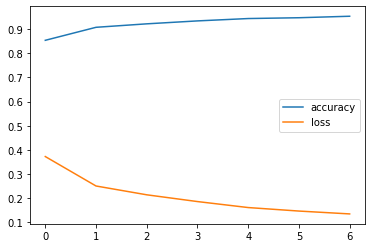

In [69]:
plt.plot(prediction.history['accuracy'],label='accuracy')
plt.plot(prediction.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

# Performing Prediction On Random Input

In [78]:
def predict_disaster(tweet):
  l = []
  l.append(tweet)
  sequence = tokenizer.texts_to_sequences(l)
  pad_seq = pad_sequences(sequence,maxlen=80,padding='pre')
  output = model.predict_classes(pad_seq)
  if int(output.round().item()) == 1:
    print("True,it's a true news after disaster")
  else:
    print("This is a False news")

In [76]:
predict_disaster("Communal violence in Bhainsa, Telangana.Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…")

True,it's a true news after disaster


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
predict_disaster('Breaking news:Nigeria flag set ablaze in Aba.')

This is a False news


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
